<div style="text-align: right">Paul Novaes<br>June 2018</div> 

# Classic Fractals

This notebook shows how to render a few classic fractals:
* Koch snowflake
* Sierpinski triangle
* Mandelbrot set
* Hilbert curve

## Common code

In [1]:
import matplotlib.pyplot as plt

The following function allows to draw the fractals as images instead of plots in a graph:

In [2]:
def init_graphics():
    plt.axes().set_aspect('equal')
    plt.axis('off')

This utility function will be useful for the Koch snowflake and the Sierpinski triangle:

In [3]:
import math

# Given a segment [P1, P2] returns a point P3 such that [P1, P2, P3] is an
# equilateral triangle (counter-clockwise).
def complete_triangle(P1, P2):
    [x1, y1] = P1
    [x2, y2] = P2
    return [(x1 + x2) / 2 - (y2 - y1) * math.sqrt(3) / 2,
            (y1 + y2) / 2 + (x2 - x1) * math.sqrt(3) / 2]

## Koch snowflake

The Koch snowflake is constructed by starting with an equilateral triangle and replacing each of its sides by 4 connected segments \_/\\\_ of same length. This process is then iterated on each new segment.

Note: if we iterate $n$ times we obtain a curve of length $(4/3)^n$ times the perimeter of the original triangle. This leads to a fractal, finitely bounded, but of infinite length. 

In [4]:
# Draws the Koch curve that goes from point P1 to point P2.
def koch_curve(P1, P2, depth):
    [x1, y1] = P1
    [x2, y2] = P2
    if depth == 0:
        plt.plot([x1, x2], [y1, y2], 'black')
    else:
        # From P1, P2 consider the 4 segments [P1,A], [A,B], [B,C] and
        # [C,P2] and draw each corresponding Koch line recursively.
        #
        #            B
        #           / \
        #    P1___A/   \C__P2
        #
        A = [x1 + (x2 - x1) / 3, y1 + (y2 - y1) / 3]
        C = [x1 + 2 * (x2 - x1) / 3, y1 + 2 * (y2 - y1) / 3]
        B = complete_triangle(A, C)
        koch_curve(P1, A, depth - 1)
        koch_curve(A, B, depth - 1)
        koch_curve(B, C, depth - 1)
        koch_curve(C, P2, depth - 1)
        
def koch_snowflake(depth):
    init_graphics()
    A = [0, 0]
    B = [1, 0]
    C = complete_triangle(B, A)
    koch_curve(A, B, depth)
    koch_curve(B, C, depth)
    koch_curve(C, A, depth)

Iterating 4 times, we get:

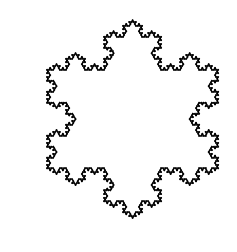

In [5]:
koch_snowflake(4)

Iterations on a given side of the original triangle:

In [6]:
def sample_koch_curve(depth):
    init_graphics()
    koch_curve([0, 0], [1, 0], depth)

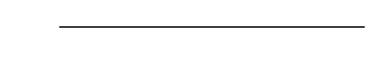

In [7]:
sample_koch_curve(0)

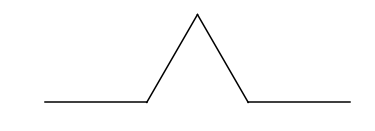

In [8]:
sample_koch_curve(1)

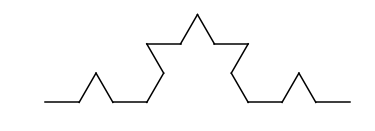

In [9]:
sample_koch_curve(2)

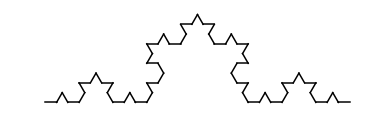

In [10]:
sample_koch_curve(3)

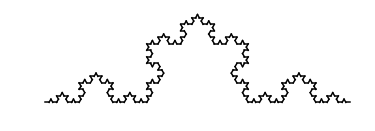

In [11]:
sample_koch_curve(4)

## Sierpinski Triangle

The Sierpinski Triangle construction starts with a filled equilateral triangle. This triangle is divided into 4 smaller equilateral triangles and the inner one is removed.

This process is then iterated on the remaining smaller triangles.

In [12]:
def fill_triangle(A, B, C):
    plt.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], "black")

def remove_triangle(A, B, C):
    plt.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], "white")

def get_inner_triangle(A, B, C):
    AA = [(B[0] + C[0])/2, (B[1] + C[1])/2]
    BB = [(A[0] + C[0])/2, (A[1] + C[1])/2]    
    CC = [(A[0] + B[0])/2, (A[1] + B[1])/2]
    return [AA, BB, CC]

def sierpinski_for_triangle(A, B, C, depth):
    if depth == 0:
        return
    [AA, BB, CC] = get_inner_triangle(A, B, C)
    remove_triangle(AA, BB, CC)
    sierpinski_for_triangle(A, BB, CC, depth - 1)
    sierpinski_for_triangle(AA, B, CC, depth - 1)
    sierpinski_for_triangle(AA, BB, C, depth - 1)
    
def sierpinski(depth):
    init_graphics()
    A = [0, 0]
    B = [1, 0]
    C = complete_triangle(A, B)
    fill_triangle(A, B, C)
    sierpinski_for_triangle(A, B, C, depth)

Let's run a few iterations:

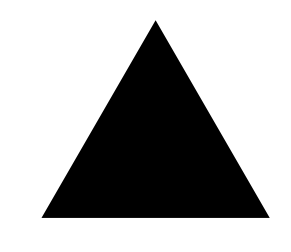

In [13]:
sierpinski(0)

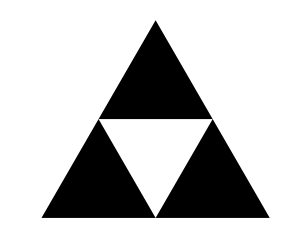

In [14]:
sierpinski(1)

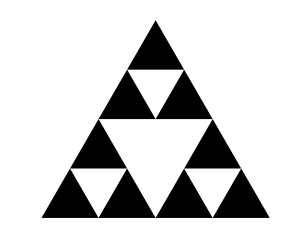

In [15]:
sierpinski(2)

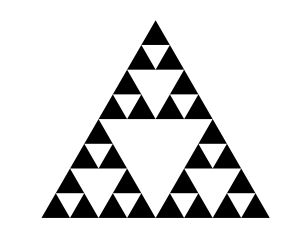

In [16]:
sierpinski(3)

Jumping to depth 7:

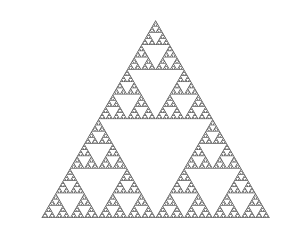

In [17]:
sierpinski(8)

## Mandelbrot Set

The Mandelbrot set is defined as the set of complex numbers $c$ such that the sequence:
* $z_0 = 0$
* for $n \ge 0$, $z_{n+1} = z_n^2 + c$

is bounded.

In [18]:
import numpy

# Returns true if the sequence is (probably) bounded.
def is_in_mandelbrot_set(c):
    z = 0
    for i in range(200):
        z = z * z + c
        if numpy.absolute(z) > 2:
            return False
    return True

def mandelbrot(x0, x1, y0, y1):
    init_graphics()
    # Note: choose 100 instead of 200 for faster (though less precise) rendering.
    delta = min((x1 - x0) / 200, (y1 - y0) / 200)
    for x in numpy.arange(x0 , x1, delta):
        for y in numpy.arange(y0, y1, delta):
            if is_in_mandelbrot_set(x + y*1j):
                plt.fill([x, x + delta, x + delta, x], 
                         [y, y, y + delta, y + delta], 'black')

Let's display the full set and then let's zoom in. 

Note: the actual Mandelbrot set is connected, even if graphics and computation limitations make the following renderings appear disconnected at times.

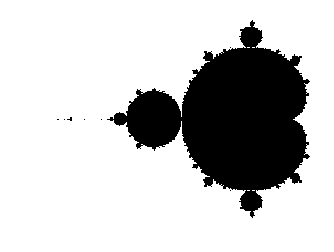

In [19]:
mandelbrot(-2, 1, -1, 1)

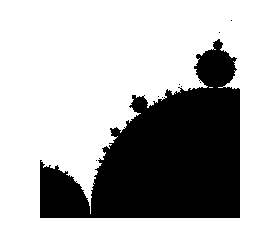

In [20]:
mandelbrot(-1, 0, 0, 1)

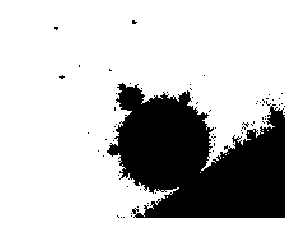

In [21]:
mandelbrot(-0.66, -0.4, 0.5, 0.72)

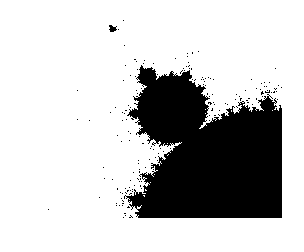

In [22]:
mandelbrot(-0.57, -0.50, 0.57, 0.63)

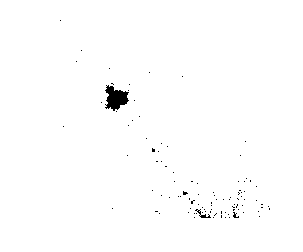

In [23]:
mandelbrot(-0.56, -0.535, 0.615, 0.635)

## Hilbert Curve

The Hilbert curve is a continuous curve that fills an entire square. It can be seen as the limit of the Hilbert curve or order $n$, which is defined recursively.

In [24]:
def draw_horizontal(i, j):
    plt.plot([i, i + 1], [j, j], 'black')

def draw_vertical(i, j):
    plt.plot([i, i], [j, j + 1], 'black')

# Draws the Hilbert curve of given order, within the square of origin
# (i, j) and side length 2**order.
def draw_hilbert(i, j, order, orientation):
    if order <= 0:
        return
    # Maps orientation to the orientations of the sub-quadrants. 
    orientations_map = {'S': 'WSSE', 'N': 'NWEN', 'W': 'SNWW', 'E': 'EENS'}
    orientations = orientations_map[orientation]
    # Each sub-quadrant is within a square of side length L.
    L = 2 ** order / 2
    # Recurse over the 4 sub-quadrants.
    draw_hilbert(i,     j,     order - 1, orientations[0])
    draw_hilbert(i,     j + L, order - 1, orientations[1])
    draw_hilbert(i + L, j + L, order - 1, orientations[2])
    draw_hilbert(i + L, j,     order - 1, orientations[3])
    # Connect the 4 sub Hilbert curves with 3 lines.
    if orientation == 'S':
        draw_horizontal(i + L - 1,   j + L)
        draw_vertical(  i,           j + L - 1)
        draw_vertical(  i + 2*L - 1, j + L - 1)
    if orientation == 'N':
        draw_horizontal(i + L - 1,   j + L - 1)
        draw_vertical(  i,           j + L - 1)
        draw_vertical(  i + 2*L - 1, j + L - 1)
    if orientation == 'W':
        draw_vertical(  i + L,       j + L - 1)
        draw_horizontal(i + L - 1,   j)
        draw_horizontal(i + L - 1,   j + 2*L - 1)
    if orientation == 'E':
        draw_vertical(  i + L - 1,   j + L - 1)
        draw_horizontal(i + L - 1,   j)
        draw_horizontal(i + L - 1,   j + 2*L - 1)

# Draws the Hilbert curve of given order.
def hilbert(order, orientation = 'N'):
    init_graphics()
    draw_hilbert(0, 0, order, orientation)

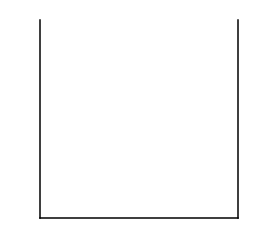

In [25]:
hilbert(1)

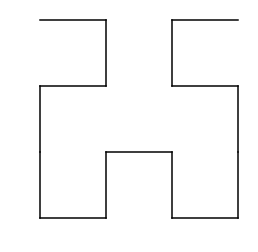

In [26]:
hilbert(2)

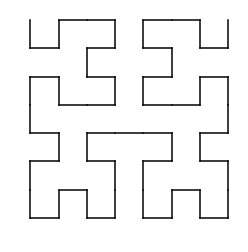

In [27]:
hilbert(3)

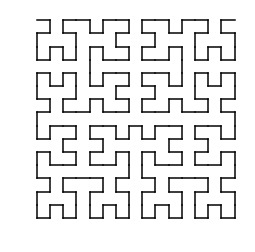

In [28]:
hilbert(4)

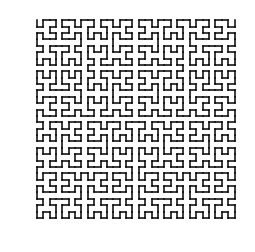

In [29]:
hilbert(5)

In general, we get $H_n$ by starting with 4 copies of $H_{n-1}$ appropriately rotated. For example:

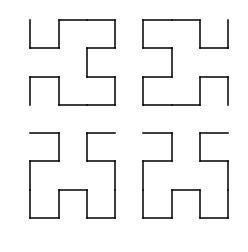

In [30]:
def H_3(show_connections):
    init_graphics()
    draw_hilbert(0, 0, 2, 'N')
    draw_hilbert(0, 4, 2, 'W')
    draw_hilbert(4, 0, 2, 'N')
    draw_hilbert(4, 4, 2, 'E')
    if show_connections:
        plt.plot([0, 0], [3, 4], 'red')
        plt.plot([3, 4], [3, 3], 'red')
        plt.plot([7, 7], [3, 4], 'red')

H_3(False)

We then connect appropriately the different copies:

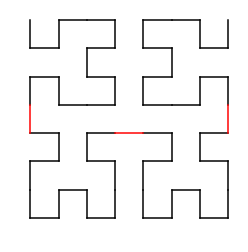

In [31]:
H_3(True)